In [74]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score, mean_squared_error
import matplotlib.pyplot as plt

## Drzewa decyzyjne

### Classification

In [38]:
# 3.3 szukamy max wspolczynnika f1 - sprawdzac dla testowego i treningowego (zeby uniknac overfittingu)
# 4.4 naniesc przebieg regresora (tak jak w wielomianowej) - nie jest to punktowane btw wiec 
# zrobic jak bedzie czas

#### Breast cancer

In [40]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [41]:
# split the dataset
X = data_breast_cancer['data']
y = data_breast_cancer['frame'].target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [44]:
f1_train = []
f1_test = []
depth_range = [x for x in range(1,10)]

for depth in range(1, 10):
    tree_clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    tree_clf.fit(X_train,y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_test_train = tree_clf.predict(X_test)
    f1_train_val = f1_score(y_train, y_pred_train)
    f1_test_val = f1_score(y_test, y_test_train)
    f1_train.append(f1_train_val)
    f1_test.append(f1_test_val)

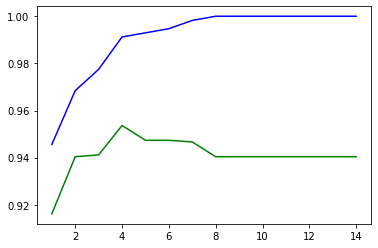

In [33]:
plt.plot(depth_range, f1_train, 'b')
plt.plot(depth_range, f1_test, 'g')

# depth = 5 wyglada legit

### save data to pickle

## Regression

<AxesSubplot:xlabel='x', ylabel='y'>

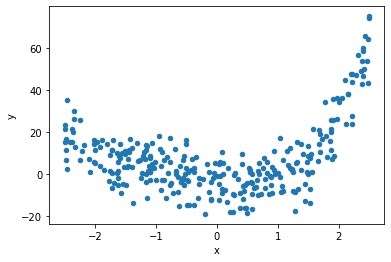

In [55]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [71]:
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)

In [79]:
MSE_train = []
MSE_test = []
depth_range = [x for x in range(1,12)]

for depth in range(1, 12):
    tree_clf = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    tree_clf.fit(X_train,y_train)
    y_pred_train = tree_clf.predict(X_train)
    y_test_train = tree_clf.predict(X_test)
    MSE_train_val = mean_squared_error(y_train, y_pred_train)
    MSE_test_val = mean_squared_error(y_test, y_test_train)
    MSE_train.append(MSE_train_val)
    MSE_test.append(MSE_test_val)

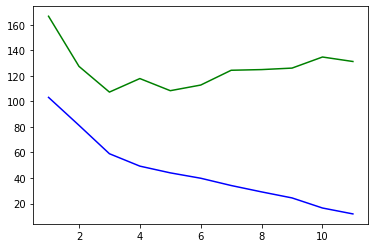

In [80]:
plt.plot(depth_range, MSE_train, 'b')
plt.plot(depth_range, MSE_test, 'g')

# tutaj depth = 5 wyglada legit

In [93]:
# dla depth = 5

tree_reg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
tree_reg.fit(X_train,y_train)
y_pred = tree_reg.predict(X)

<AxesSubplot:xlabel='x', ylabel='y'>

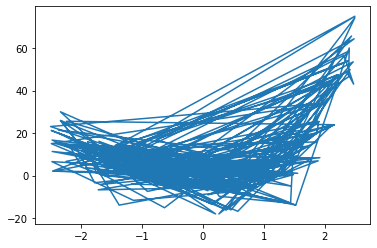

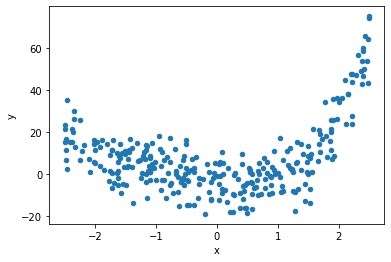

In [94]:
plt.clf()

pred_data = pd.DataFrame(X, y_pred)

plt.plot(X, y_pred, '')
df.plot.scatter(x='x',y='y')

### Decision tree visualisation

In [95]:
from sklearn.tree import export_graphviz

dot = export_graphviz(tree_reg)
dot.render(obj)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[0] <= 1.962\\nsquared_error = 286.125\\nsamples = 240\\nvalue = 7.494"] ;\n1 [label="X[0] <= -1.783\\nsquared_error = 98.505\\nsamples = 219\\nvalue = 3.305"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[0] <= -2.009\\nsquared_error = 51.978\\nsamples = 28\\nvalue = 14.163"] ;\n1 -> 2 ;\n3 [label="X[0] <= -2.372\\nsquared_error = 49.313\\nsamples = 19\\nvalue = 16.349"] ;\n2 -> 3 ;\n4 [label="X[0] <= -2.485\\nsquared_error = 38.906\\nsamples = 9\\nvalue = 14.041"] ;\n3 -> 4 ;\n5 [label="X[0] <= -2.491\\nsquared_error = 0.842\\nsamples = 2\\nvalue = 22.168"] ;\n4 -> 5 ;\n6 [label="squared_error = 0.0\\nsamples = 1\\nvalue = 23.085"] ;\n5 -> 6 ;\n7 [label="squared_error = 0.0\\nsamples = 1\\nvalue = 21.25"] ;\n5 -> 7 ;\n8 [label="X[0] <= -2.438\\nsquared_error = 25.523\\nsamples = 7\\nvalue = 11.719"] ;\n4 -> 8 ;\n9 [label="X[0] <= -2.466\\nsquared_error 

In [98]:
from sklearn.tree import export_graphviz
f = "iris_tree.dot"
export_graphviz(
        tree_reg,
        out_file=f,
        rounded=True,
        filled=True
) 
print(f)

iris_tree.dot


### save data to pickle